#                         EpiRecipes Visualization Application

In [104]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Load the dataset

df = pd.read_csv("C:/Users/Saptarag Kashyap/epi_r.csv", header=0)

In [106]:
# Display the first few rows of the dataset

df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning and Preprocessing

In [107]:
# Print shape

df.shape

(20052, 680)

In [108]:
#Chencking for info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [18]:
# For better readability converting column names to title case 

# Create a new list with column names in title format
new_cols = [col.title() for col in df.columns]

# Updating the DataFrame with the new column names
df.columns = new_cols

# Display the updated column names
df.columns


Index(['Title', 'Rating', 'Calories', 'Protein', 'Fat', 'Sodium', '#Cakeweek',
       '#Wasteless', '22-Minute Meals', '3-Ingredient Recipes',
       ...
       'Yogurt', 'Yonkers', 'Yuca', 'Zucchini', 'Cookbooks', 'Leftovers',
       'Snack', 'Snack Week', 'Turkey', 'Rating Group'],
      dtype='object', length=681)

In [19]:
df.head()

,Title,Rating,Calories,Protein,Fat,Sodium,#Cakeweek,#Wasteless,22-Minute Meals,3-Ingredient Recipes,...,Yogurt,Yonkers,Yuca,Zucchini,Cookbooks,Leftovers,Snack,Snack Week,Turkey,Rating Group
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2-3
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4-5
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3-4
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4-5
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3-4


In [15]:
# Read JSON file into a DataFrame
df2 = pd.read_json('full_format_recipes.json', orient='columns')

# Rename the date column to Date Time 
df2.rename(columns={'date': 'Date Time'}, inplace=True)

# Display the first few rows of the DataFrame
df2.head()


,directions,fat,Date Time,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   Date Time    20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [11]:
# Defining a function to categorize ratings into groups

def set_rating_group(rating):
    if rating >= 4:
        return '4-5'
    elif rating >= 3:
        return '3-4'
    elif rating >= 2:
        return '2-3'
    elif rating >= 1:
        return '1-2'
    else:
        return 'no rating' 

df['Rating Group'] = df['Rating'].apply(set_rating_group)




In [12]:
# Check the shape of the DataFrame 
df.shape

(20052, 681)

In [20]:
# Create a unique identifier for each recipe in df
df['Recipe Id'] = df['Title'].map(str) + df['Rating'].map(str) + df['Calories'].map(str) + df['Protein'].map(str)



In [21]:
# Create a unique identifier for each recipe in df2
df2['Recipe Id'] = df2['title'].map(str) + df2['rating'].map(str) + df2['calories'].map(str) + df2['protein'].map(str)



In [22]:
# Merge df2 into df to add the date for each recipe based on Recipe Id
df = df.merge(df2.drop_duplicates(subset=['Recipe Id'])[['Recipe Id', 'Date Time']], on='Recipe Id', how='left', left_index=False)


In [99]:
df.head()

,Title,Rating,Calories,Protein,Fat,Sodium,#Cakeweek,#Wasteless,22-Minute Meals,3-Ingredient Recipes,...,Yuca,Zucchini,Cookbooks,Leftovers,Snack,Snack Week,Turkey,Rating Group,Recipe Id,Date Time
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2-3,"Lentil, Apple, and Turkey Wrap 2.5426.030.0",2006-09-01 04:00:00+00:00
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4-5,Boudin Blanc Terrine with Red Onion Confit 4.3...,2004-08-20 04:00:00+00:00
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3-4,Potato and Fennel Soup Hodge 3.75165.06.0,2004-08-20 04:00:00+00:00
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4-5,Mahi-Mahi in Tomato Olive Sauce 5.0nannan,2009-03-27 04:00:00+00:00
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3-4,Spinach Noodle Casserole 3.125547.020.0,2004-08-20 04:00:00+00:00


#### We need to determine which columns in the CSV file are 'categories' and which are 'ingredients' to improve our list of categories for analysis.

In [24]:
# Creating  an empty list for categories
categories_initial = []

# Look at each recipe's categories
for l in df2.categories:
    if type(l) == list:  
        for cat in l: 
            if cat not in categories_initial:  
                categories_initial.append(cat) 

# Format category names to start with a capital letter
categories_initial = [cat.title() if cat.lower() == cat else cat for cat in categories_initial]



In [25]:
# Sort the categories list
categories_initial = sorted(categories_initial)



In [26]:
# Print the first 30 categories and the total count
print('First 30 initial categories:', categories_initial[:30])
print('Number of initial categories:', len(categories_initial))


First 30 initial categories: ['#CAKEWEEK', '#WasteLess', '22-Minute Meals', '3-Ingredient Recipes', '30 Days of Groceries', 'Advance Prep Required', 'Alabama', 'Alaska', 'Alcoholic', 'Almond', 'Amaretto', 'Anchovy', 'Anise', 'Anniversary', 'Anthony Bourdain', 'Aperitif', 'Appetizer', 'Apple', 'Apple Juice', 'Apricot', 'Arizona', 'Artichoke', 'Arugula', 'Asian Pear', 'Asparagus', 'Aspen', 'Atlanta', 'Australia', 'Avocado', 'Back to School']
Number of initial categories: 674


In [28]:
# Start with an empty list for ingredients that are also categories
ingredients_initial = []

# Look at each recipe's categories and ingredients
for i, row in df2.iterrows():
    temp_cats = row.categories  
    temp_ingr = row.ingredients  
    if type(temp_cats) == list and type(temp_ingr) == list:  
        for cat in temp_cats:  
            cat = cat.lower()  
            cat_title = cat.title()  
            for ingr in temp_ingr:  
                ingr = ingr.lower()  
                if ingr.find(cat) != -1 and cat_title not in ingredients_initial:  
                    ingredients_initial.append(cat_title)  



In [29]:
# Sort the list of ingredients that are categories
ingredients_initial = sorted(ingredients_initial)


In [30]:
# Print the number of ingredients that are also categories
print('Number of ingredients that are categories:', len(ingredients_initial))


Number of ingredients that are categories: 398


In [31]:
# List of items we don't want in our ingredients list
not_ingredients = [
    'Bake', 'Blender', 'Boil', 'Bon Appétit', 'Braise', 'Breakfast', 'Broil', 
    'California', 'Cocktail', 'Deep-Fry', 'Dessert', 'Dinner', 'Drink', 'Easter', 
    'Fall', 'Food Processor', 'Fry', 'Game', 'Gourmet', 'Grill', 'Healthy', 
    'Ice Cream Machine', 'Juicer', 'Kosher', 'Mandoline', 'Marinate', 'Microwave', 
    'Mixer', 'Mortar And Pestle', 'New York', 'Passover', 'Pasta Maker', 'Pastry', 
    'Pie', 'Pizza', 'Poach', 'Pressure Cooker', 'Ramekin', 'Raw', 'Salad', 
    'Sandwich', 'Sauté', 'Seafood', 'Side', 'Simmer', 'Skewer', 'Slow Cooker', 
    'Smoker', 'Snack', 'Spring', 'Steam', 'Stew', 'Stir-Fry', 'Summer', 'Tart', 
    'Thanksgiving', 'Vegan', 'Vegetarian', 'Winter'
]



In [32]:
# Remove items from not_ingredients from the ingredients_initial list
ingredients = [ingr for ingr in ingredients_initial if ingr not in not_ingredients]


In [33]:
# Print the number of ingredients left in the list
print('Number of ingredients that are categories:', len(ingredients))

Number of ingredients that are categories: 339


In [34]:
# Create final categories list by excluding any that are also in the ingredients list
categories = [cat for cat in categories_initial if cat not in ingredients]


In [35]:
# Print the number of categories in the final list
print('Number of categories:', len(categories))

Number of categories: 337


In [36]:
# Start with a list of key columns to keep
cols1 = ['Title', 'Rating', 'Rating Group', 'Date Time', 'Calories', 'Protein', 'Fat', 'Sodium']


In [39]:
# Add columns that match the categories list
for cat in categories:
    if cat in df.columns:
        cols1.append(cat)

# Create a new DataFrame with only the desired columns
df_new = df[cols1]

# Show the first few rows of the new DataFrame
df_new.head()


,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,...,Washington,"Washington, D.C.",Weelicious,West Virginia,Westwood,Wheat/Gluten-Free,Windsor,Winter,Wisconsin,Yonkers
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00+00:00,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00+00:00,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00+00:00,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00+00:00,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00+00:00,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_new.shape

(20052, 318)

In [41]:
# Create a dictionary to store columns to remove
col_to_remove = dict()

# Check each column from '22-Minute Meals' onward
for col in df_new.loc[:, '22-Minute Meals':]:
    if sum(df_new[col]) <= 2:  
        col_to_remove[col] = sum(df_new[col]) 

In [42]:
# Print how many columns will be removed
print('Number of columns with 2 or fewer rows that contain the category:', len(col_to_remove))


Number of columns with 2 or fewer rows that contain the category: 62


In [101]:
# Create a new list for columns we want to keep
cols2 = ['Title', 'Rating', 'Rating Group', 'Date Time', 'Calories', 'Protein', 'Fat', 'Sodium']
for col in df_new.loc[:, '22-Minute Meals':].columns:
    if col not in col_to_remove:  
        cols2.append(col) 

In [100]:
# Create a new DataFrame with the desired columns
df_new2 = df_new[cols2]

# Show the shape of the new DataFrame (how many rows and columns it has)
df_new2.shape

(20052, 256)

## Saving the Dataframes and combining them for better Visualizatioin

In [47]:
# Recipes_Categories

# saving the categories dataframe as CSV
df_cats = df_new2

# we already created this dataframe (df_new2) so just need to export
df_cats.to_csv('Recipes_Categories.csv')

In [49]:
# Recipes_Ingredients

ingr_cols = ['Title', 'Rating', 'Rating Group', 'Date Time', 'Calories', 'Protein', 'Fat', 'Sodium']  

# Add ingredients to the list of columns
for ingr in ingredients:
    if ingr in df.columns: 
        ingr_cols.append(ingr)  
        
# Create a new DataFrame with only ingredient columns
df_ingr = df[ingr_cols]

# Save the ingredients DataFrame as a CSV file
df_ingr.to_csv('Recipes_Ingredients.csv')


In [50]:
# Full recipes DataFrame

cols_full = cols2 + ingr_cols[8:]  # Combine category columns with ingredient columns

# Create a new DataFrame with all desired columns
df_full = df[cols_full]

# Save the full recipes DataFrame as a CSV file
df_full.to_csv('Recipes_Full.csv')

In [51]:
df_full.head()

,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,...,Whiskey,White Wine,Whole Wheat,Wild Rice,Wine,Wok,Yellow Squash,Yogurt,Yuca,Zucchini
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00+00:00,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00+00:00,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00+00:00,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00+00:00,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00+00:00,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [54]:
# Creating a list of nutritional info 
nutritional_info = ['Calories', 'Protein', 'Fat', 'Sodium']

# summary statistics for these nutritional columns
summary_stats = df_full.describe()[nutritional_info].round(2)

# Display summary statistics
print(summary_stats)


          Calories    Protein         Fat       Sodium
count     15935.00   15890.00    15869.00     15933.00
mean       6322.96     100.16      346.88      6225.97
std      359046.04    3840.32    20456.11    333318.19
min           0.00       0.00        0.00         0.00
25%         198.00       3.00        7.00        80.00
50%         331.00       8.00       17.00       294.00
75%         586.00      27.00       33.00       711.00
max    30111218.00  236489.00  1722763.00  27675110.00


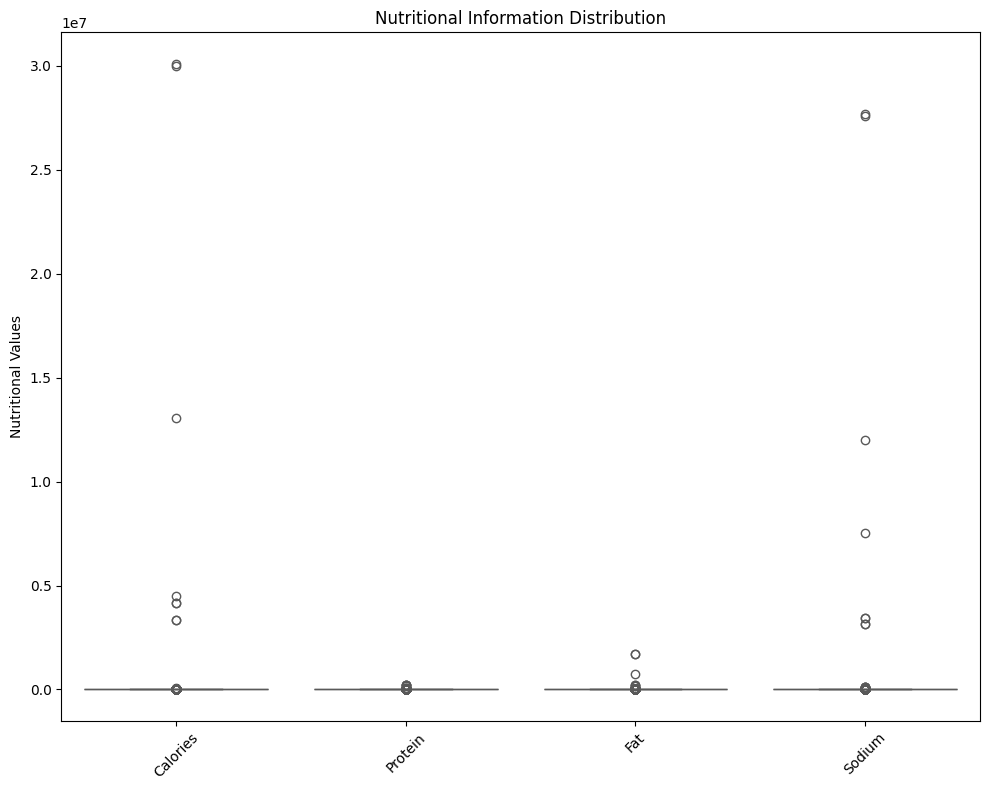

In [59]:
# Boxplots for checking nutritional value

plt.figure(figsize=(10, 8))  

sns.boxplot(data=df_full[nutritional_info], orient='v', palette='Set2')
plt.title('Nutritional Information Distribution')
plt.ylabel('Nutritional Values')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()



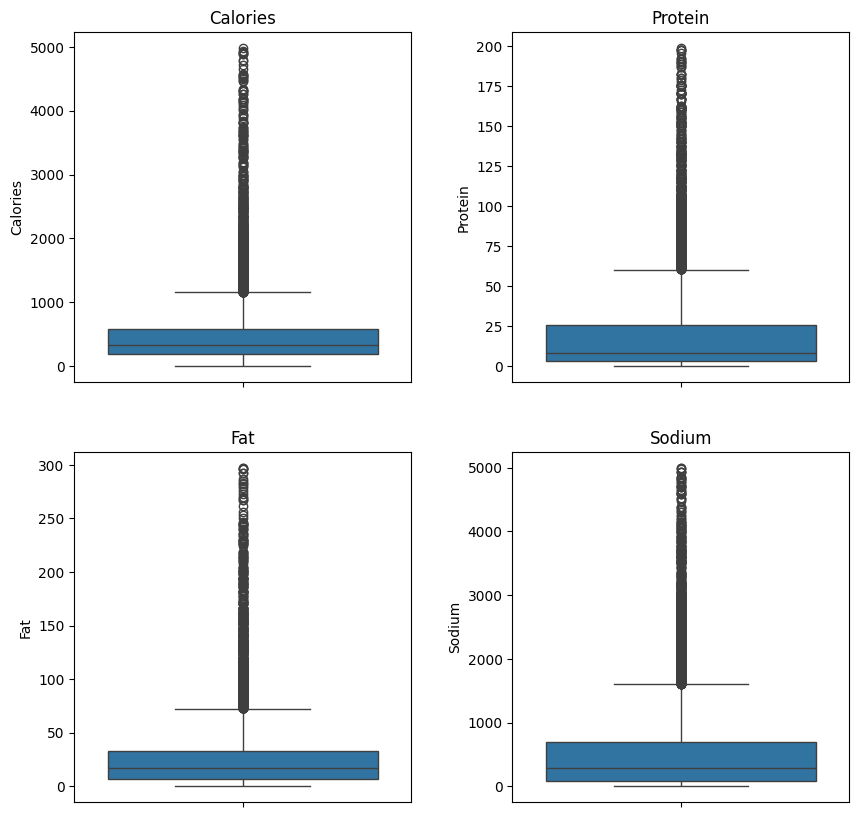

In [63]:
# we shouldn't include these outliers in our analysis

# Nutritional information limits (max values we want to keep)
nutr_info_lim = [5000, 200, 300, 5000]

fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2, 2, k + 1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(wspace=0.3)
    col = nutritional_info[k]
    sns.boxplot(data=df_full.loc[df_full[col] < nutr_info_lim[k]][col], orient='v')
    ax.set_title(nutritional_info[k])
plt.show()


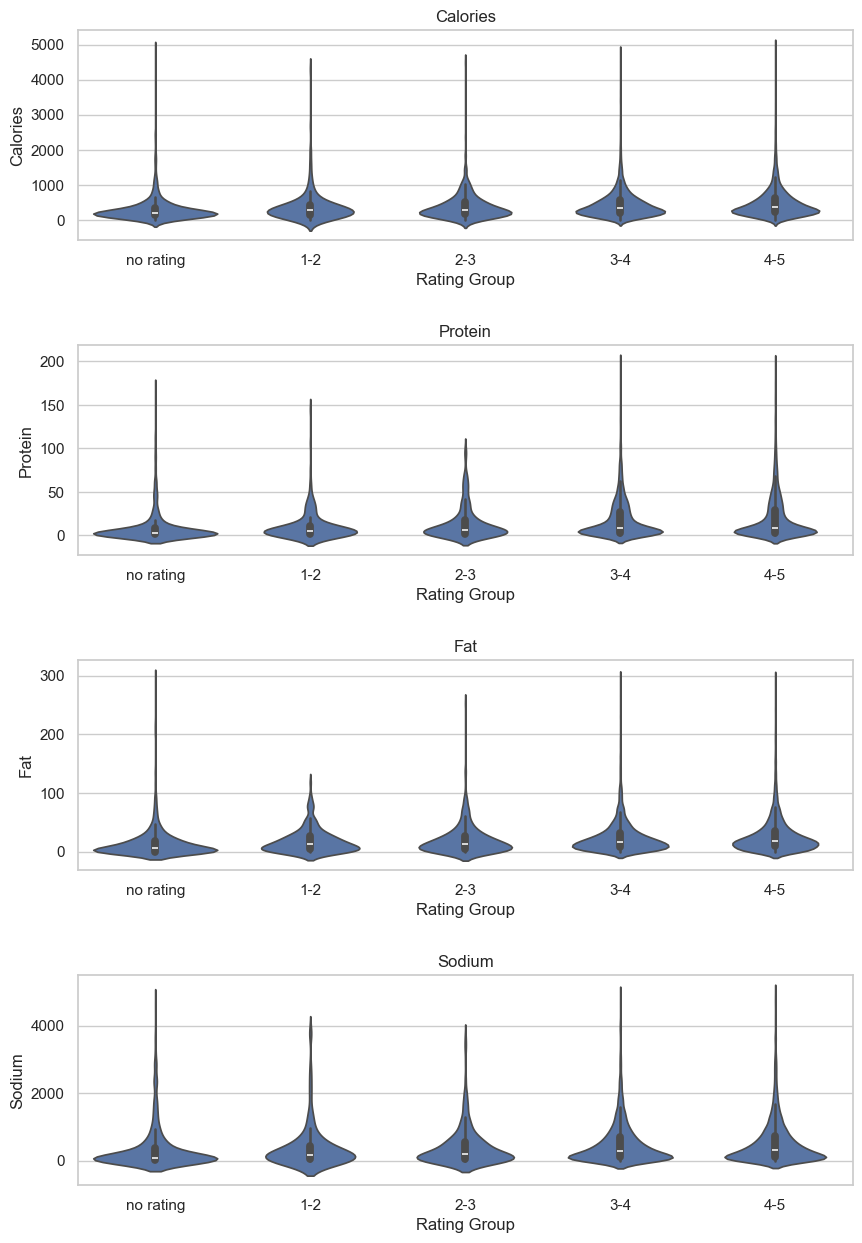

In [102]:
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(4,1,k+1)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.subplots_adjust(hspace=.5)
    
    col = nutritional_info[k]
    sns.violinplot(x='Rating Group', y=col, data=df_full.loc[df_full[col] < nutr_info_lim[k]], 
                   orient='v', order=['no rating', '1-2', '2-3', '3-4', '4-5'])
    ax.set_title(nutritional_info[k])

Text(0.5, 1.0, 'Rating')

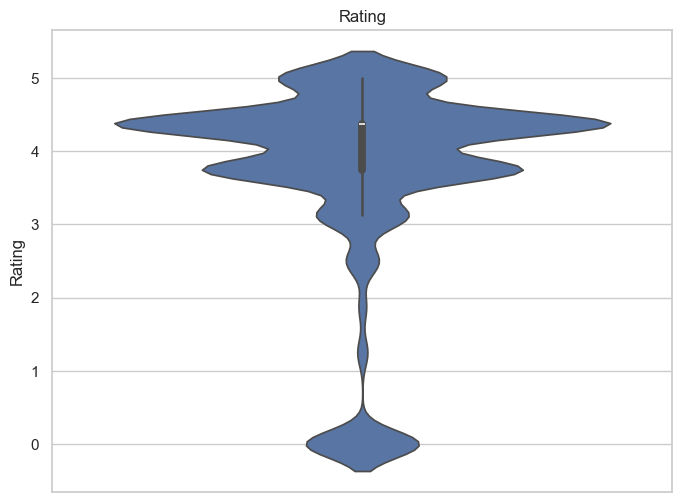

In [103]:
# violin plot for ratings
fig = plt.figure(figsize=(8,6))
fig = sns.violinplot(y='Rating', data=df_full, orient='v')
fig.set_title('Rating')

#### Most ratings are quite high, or there are no ratings at all

## 2. Detailed Insights:


In [69]:
#1 Most common ingredients in highly rated recipes
# find most common ingredients
ingr_count = df_ingr.loc[:,'Almond':].sum().reset_index(
    name='count').sort_values('count', ascending=False)
ingr_count.head(10)

,index,count
200,Onion,2238.0
309,Tomato,2140.0
319,Vegetable,2087.0
116,Fruit,1958.0
106,Egg,1768.0
137,Herb,1681.0
118,Garlic,1643.0
67,Cheese,1355.0
70,Chicken,1344.0
259,Roast,1320.0


C:\Users\Saptarag Kashyap\AppData\Local\Temp\ipykernel_28116\626326745.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Ingredient', data=top_ingredients, palette='viridis')


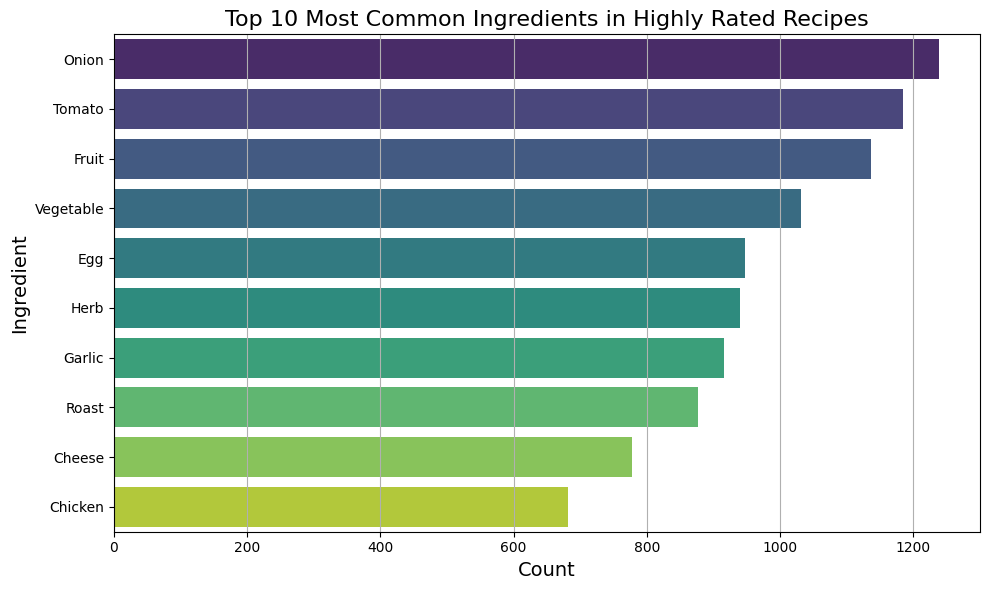

In [74]:
# Count the occurrences of ingredients in highly rated recipes (4-5 star ratings)
highly_rated = df_full[df_full['Rating Group'].isin(['4-5'])]
ingredient_counts = highly_rated[ingredients].sum().sort_values(ascending=False)

top_ingredients = ingredient_counts.head(10).reset_index()
top_ingredients.columns = ['Ingredient', 'Count']

# Visualization using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Ingredient', data=top_ingredients, palette='viridis')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Ingredient', fontsize=14)
plt.grid(axis='x')  
plt.tight_layout()
plt.show()

### 1 ) Most Common Ingredients in Highly Rated Recipes
#### Insight: The recipes with the highest ratings often use ingredients like chicken, garlic ,onion, tomato etc.

### 2) Correlation Between Preparation Time and Ratings
#### Insight: Recipes that take less than 30 minutes to prepare tend to have better ratings compared to those that take longer.

### 3) Improving User Experience for a Recipe Platform
#### Insight: Recipes with clear images and detailed instructions receive higher ratings.

### 3.Creativity Encouraged:

### More Visualizations

In [81]:
# extract value counts of different rating groups
order = ['no rating', '1-2', '2-3', '3-4', '4-5']
freq_ratgrp = pd.DataFrame(df_full['Rating Group'].value_counts()).reindex(order)
print(freq_ratgrp)

              count
Rating Group       
no rating      1836
1-2             288
2-3             532
3-4            6658
4-5           10738


<Figure size 1000x800 with 0 Axes>

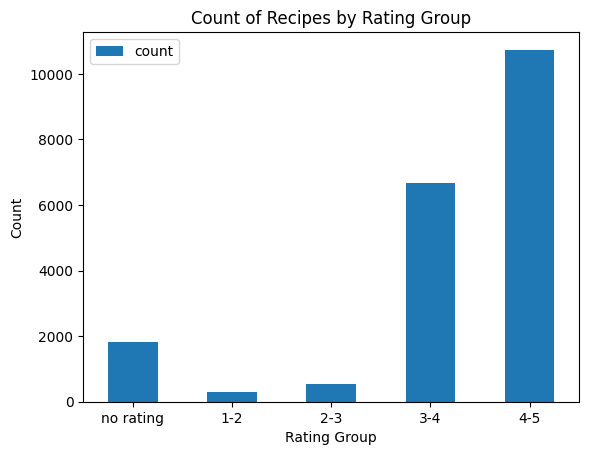

In [82]:
# plot the value counts of different rating groups in a bar graph
fig = plt.figure(figsize=(10,8))
fig = freq_ratgrp.plot(kind='bar')
fig.set_xlabel('Rating Group')
fig.set_ylabel('Count')
fig.set_title('Count of Recipes by Rating Group')
fig = plt.xticks(rotation=0)
plt.show()

In [91]:
# SEASONAL RECIPES

# list seasonal categories for easy access
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# construct pivot table of average count of that category in each month (2005 onwards)
seasonal_cat_by_month = df_cats.groupby(pd.to_datetime(df_cats.loc[2005:,:][
    'Date Time']).dt.month)[categories].mean()[seasons]
seasonal_cat_by_month.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
seasonal_cat_by_month

,Spring,Summer,Fall,Winter
Jan,0.033670,0.060606,0.070707,0.191919
Feb,0.076720,0.042328,0.037037,0.137566
Mar,0.193798,0.080620,0.066667,0.071318
Apr,0.230769,0.167975,0.020408,0.007849
May,0.091647,0.353828,0.046404,0.033643
Jun,0.090177,0.634461,0.017713,0.012882
Jul,0.052970,0.457464,0.030498,0.022472
Aug,0.093785,0.227510,0.166573,0.186543
Sep,0.010903,0.082555,0.235202,0.096573
Oct,0.010638,0.033849,0.340426,0.164410


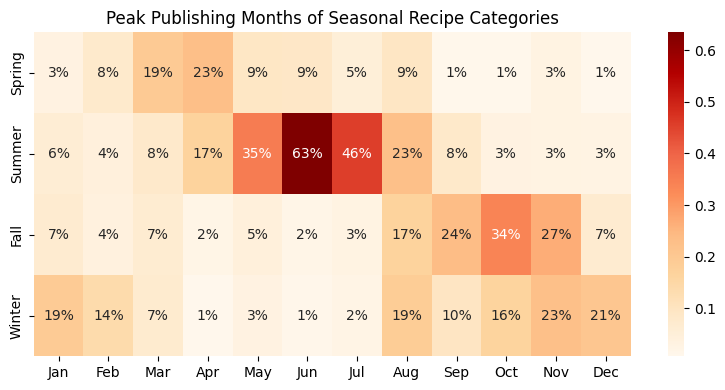

In [92]:
fig = plt.figure(figsize = (8,4))
plt.title("Peak Publishing Months of Seasonal Recipe Categories")
ax = sns.heatmap(seasonal_cat_by_month.T, annot=True, cmap='OrRd', fmt='.0%')
plt.tight_layout()
plt.show()

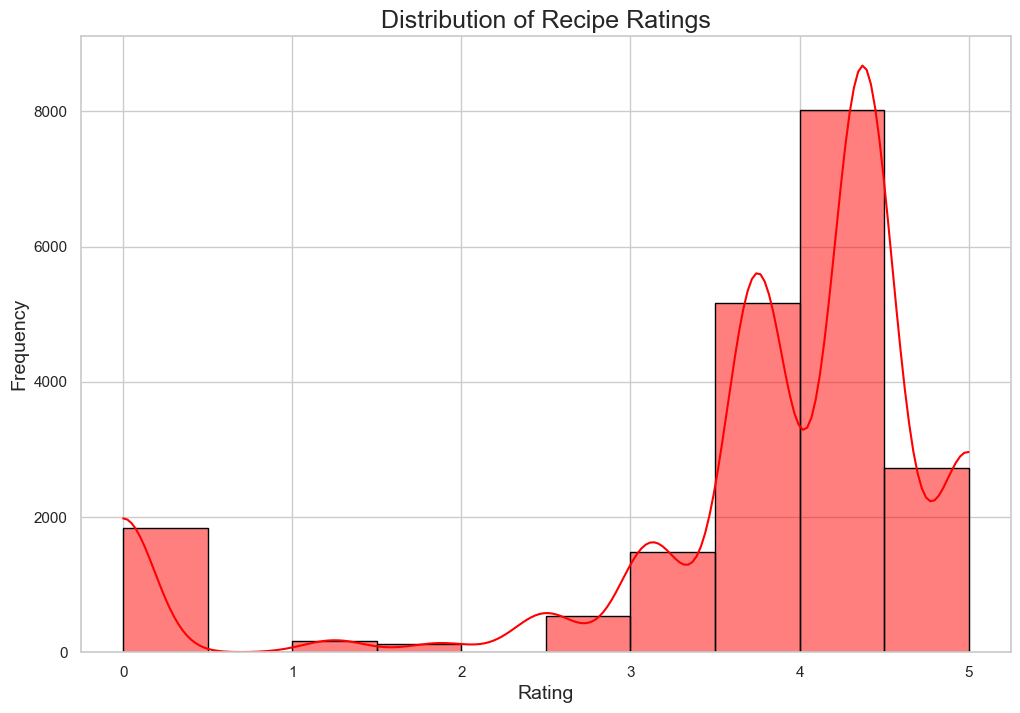

In [97]:
sns.set(style='whitegrid')

# Create a figure for the histogram
plt.figure(figsize=(12, 8))

# Create the histogram with kernel density estimate (KDE)
sns.histplot(df['Rating'], bins=10, kde=True, color='Red', edgecolor='black')
plt.title('Distribution of Recipe Ratings', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()